# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Reza Pahlevi]
- **Email:** [mc284d5y2330@student.devacademy.id]
- **ID Dicoding:** [mc284d5y2330]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim, suhu, dan kelembapan terhadap jumlah penyewaan sepeda?

2. Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [42]:
day_df = pd.read_csv('/content/data/day.csv')
print("load data day", day_df.head())
hour_df = pd.read_csv('/content/data/hour.csv')
print("load data hour ", hour_df.head())

load data day    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
load data ho

Penyewaan sepeda cenderung lebih tinggi pada hari kerja dibanding hari libur (workingday = 1).
Suhu dan kelembaban memiliki variasi yang dapat memengaruhi pola penyewaan.
Dataset memiliki distribusi data yang cukup bersih tanpa nilai kosong yang terlihat dalam sampel awal.
Jika ingin insight lebih dalam, kita bi

### Assessing Data

In [84]:
day_df.info()
print("missing value :", day_df.isna().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("menampilkan ringkasan parameter statistik", day_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      731 non-null    datetime64[ns]
 1   yr          731 non-null    datetime64[ns]
 2   mnth        731 non-null    datetime64[ns]
 3   holiday     731 non-null    datetime64[ns]
 4   weekday     731 non-null    datetime64[ns]
 5   workingday  731 non-null    datetime64[ns]
 6   weathersit  731 non-null    int64         
 7   temp        731 non-null    float64       
 8   atemp       731 non-null    float64       
 9   hum         731 non-null    float64       
 10  windspeed   731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
 14  instant     731 non-null    datetime64[ns]
 15  dteday      731 non-null    datetime64[ns]
 16  hr          731 non-null  

Pengecekan Struktur Data (day_df.info())

Menampilkan jumlah baris, kolom, tipe data, dan apakah ada nilai kosong dalam dataset.
Pengecekan Missing Values (day_df.isna().sum())

Jika hasilnya 0 untuk semua kolom, berarti dataset bersih dari missing values.
Jika ada nilai yang tidak nol, perlu dilakukan imputasi atau penghapusan data yang hilang.
Pengecekan Duplikasi (day_df.duplicated().sum())

Jika hasilnya 0, berarti tidak ada data yang terduplikasi.
Jika ada duplikasi, perlu ditelusuri lebih lanjut apakah perlu dihapus atau diperbaiki.
Ringkasan Statistik (day_df.describe())

Menampilkan statistik deskriptif seperti mean (rata-rata), median, min, max, dan standar deviasi dari setiap fitur numerik.
Dapat digunakan untuk melihat distribusi data dan mendeteksi outlier.

In [85]:
hour_df.info()
print("missing value :", hour_df.isna().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("menampilkan ringkasan parameter statistik", hour_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  datetime64[ns]
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  datetime64[ns]
 3   yr          17379 non-null  datetime64[ns]
 4   mnth        17379 non-null  datetime64[ns]
 5   hr          17379 non-null  datetime64[ns]
 6   holiday     17379 non-null  datetime64[ns]
 7   weekday     17379 non-null  datetime64[ns]
 8   workingday  17379 non-null  datetime64[ns]
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Pengecekan Struktur Data (hour_df.info())

Menampilkan jumlah total baris, kolom, tipe data pada setiap kolom, dan apakah ada nilai kosong dalam dataset.
Pengecekan Missing Values (hour_df.isna().sum())

Jika hasilnya 0 untuk semua kolom, maka dataset tidak memiliki nilai yang hilang.
Jika ada nilai yang hilang, maka perlu dilakukan penanganan seperti pengisian data atau penghapusan baris tertentu.
Pengecekan Duplikasi (hour_df.duplicated().sum())

Jika jumlah duplikasi adalah 0, berarti tidak ada duplikasi data.
Jika ada duplikasi, perlu dilakukan pengecekan lebih lanjut apakah perlu dihapus atau diperbaiki.
Ringkasan Statistik (hour_df.describe())

Menyediakan statistik deskriptif seperti mean, min, max, standar deviasi, dan quartile (Q1, median, Q3) dari fitur numerik.
Dapat membantu dalam memahami distribusi data dan mendeteksi potensi outlier.

In [87]:
# Mengecek outlier menggunakan IQR (Interquartile Range)
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = outliers_count

    return outliers

# Kolom numerik yang relevan untuk outlier detection
numeric_columns_day = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
numeric_columns_hour = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

# Mendeteksi outlier
outliers_day = detect_outliers(day_df, numeric_columns_day)
outliers_hour = detect_outliers(hour_df, numeric_columns_hour)

outliers_day, outliers_hour

({'temp': np.int64(0),
  'atemp': np.int64(0),
  'hum': np.int64(4),
  'windspeed': np.int64(28),
  'casual': np.int64(44),
  'registered': np.int64(0),
  'cnt': np.int64(0)},
 {'temp': np.int64(0),
  'atemp': np.int64(0),
  'hum': np.int64(22),
  'windspeed': np.int64(342),
  'casual': np.int64(1192),
  'registered': np.int64(680),
  'cnt': np.int64(505)})

Banyak outlier pada windspeed, yang menunjukkan adanya banyak jam dengan kecepatan angin ekstrem.
Lonjakan pengguna (casual, registered, dan cnt) menunjukkan bahwa ada jam-jam tertentu di mana peminjaman sepeda sangat tinggi, bisa jadi saat jam sibuk atau event tertentu.
Perbedaan jumlah outlier antara data harian dan per jam menunjukkan bahwa tren yang terlihat dalam data harian bisa tampak lebih ekstrem dalam skala per jam.

### Cleaning Data

In [127]:
print("konversi kolom instant, dteday ke dalam datetime")
datetime_columns = ["instant","dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

# Konversi hanya kolom tanggal
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Konversi kolom kategori agar lebih optimal
categorical_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "hr"]
for col in categorical_columns:
    day_df[col] = day_df[col].astype("category")

# Cek kembali info dataset
day_df.info()

konversi kolom instant, dteday ke dalam datetime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   season        731 non-null    category      
 1   yr            731 non-null    category      
 2   mnth          731 non-null    category      
 3   holiday       731 non-null    category      
 4   weekday       731 non-null    category      
 5   workingday    731 non-null    category      
 6   weathersit    731 non-null    int64         
 7   temp          731 non-null    float64       
 8   atemp         731 non-null    float64       
 9   hum           731 non-null    float64       
 10  windspeed     731 non-null    float64       
 11  casual        731 non-null    float64       
 12  registered    731 non-null    int64         
 13  cnt           731 non-null    int64         
 14  instant       731 non-null    datetime64[

Jika dteday hanya mewakili tanggal, Anda bisa menambahkan fitur tambahan seperti hari dalam seminggu (weekday_name) atau bulan dalam bentuk teks (month_name), yang bisa membantu dalam analisis waktu.

In [129]:
print("konversi kolom instant, dteday ke dalam datetime")
datetime_columns = ["instant","dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

# Konversi hanya kolom tanggal
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Konversi kolom kategori agar lebih optimal
categorical_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "hr"]
for col in categorical_columns:
    hour_df[col] = hour_df[col].astype("category")

# Cek kembali info dataset
hour_df.info()

konversi kolom instant, dteday ke dalam datetime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  datetime64[ns]
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  float64       
 15  registered  17379 non

Sebelum mengonversi ke kategori, cek dulu apakah jumlah nilai unik cukup kecil. Jika terlalu besar, konversi ini justru bisa meningkatkan penggunaan memori.

In [130]:
# Fungsi untuk mengganti outlier dengan batas IQR
def replace_outliers(df, columns):
    for col in columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Mengganti outlier pada kedua dataset
replace_outliers(day_df, ["hum", "windspeed", "casual"])
replace_outliers(hour_df, ["hum", "windspeed", "casual", "registered", "cnt"])

# Mengecek kembali jumlah outlier setelah penggantian
outliers_day_after = detect_outliers(day_df, numeric_columns_day)
outliers_hour_after = detect_outliers(hour_df, numeric_columns_hour)

outliers_day_after, outliers_hour_after

print('Menyimpan dataset yang sudah bersih')
day_df.to_csv('/content/data/Cleaned_day.csv', index=False)
hour_df.to_csv('/content/data/Cleaned_hour.csv', index=False)

Menyimpan dataset yang sudah bersih


QR dihitung sebagai selisih antara Q3 (persentil ke-75) dan Q1 (persentil ke-25).
Batas bawah dan atas ditentukan dengan rumus:
Lower bound = Q1 - (1.5 × IQR)
Upper bound = Q3 + (1.5 × IQR)
Jika ada data yang lebih kecil dari lower bound, maka akan diganti dengan lower bound.
Jika ada data yang lebih besar dari upper bound, maka aka
Dataset yang telah dibersihkan disimpan dalam format CSV di direktori /content/data/.
index=False memastikan bahwa index tidak ikut disimpan dalam file CSV.
File yang dihasilkan:
Cleaned_day.csv (untuk day_df)
Cleaned_hour.csv (untuk hour_df)n diganti dengan upper bound.

## Exploratory Data Analysis (EDA)

### Explore ...

In [95]:
day_summary = day_df.describe()
hour_summary = hour_df.describe()

day_summary, hour_summary


(                              season                   yr  \
 count                            731                  731   
 mean   1970-01-01 00:00:00.000000001  1970-01-01 00:00:00   
 min    1970-01-01 00:00:00.000000001  1970-01-01 00:00:00   
 25%    1970-01-01 00:00:00.000000001  1970-01-01 00:00:00   
 50%    1970-01-01 00:00:00.000000001  1970-01-01 00:00:00   
 75%    1970-01-01 00:00:00.000000001  1970-01-01 00:00:00   
 max    1970-01-01 00:00:00.000000001  1970-01-01 00:00:00   
 std                              NaN                  NaN   
 
                                 mnth                        holiday  \
 count                            731                            731   
 mean   1970-01-01 00:00:00.000000001            1970-01-01 00:00:00   
 min    1970-01-01 00:00:00.000000001            1970-01-01 00:00:00   
 25%    1970-01-01 00:00:00.000000001            1970-01-01 00:00:00   
 50%    1970-01-01 00:00:00.000000001            1970-01-01 00:00:00   
 75%    

day_df.describe()
Menghasilkan statistik deskriptif untuk dataset day_df.
hour_df.describe()
Menghasilkan statistik deskriptif untuk dataset hour_df.
day_summary, hour_summary
Menampilkan hasil ringkasan statistik dari kedua dataset.

In [131]:

# Buat agregasi data harian berdasarkan tanggal
daily_trend = day_df.groupby('dteday')['cnt'].sum()

# Konversi kolom tanggal pada dataset hourly
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Agregasi data per jam menjadi tren harian
hourly_trend = hour_df.groupby('dteday')['cnt'].sum()

# Mengembalikan ringkasan data tren harian dari kedua dataset
daily_trend.describe(), hourly_trend.describe()


(count        33.000000
 mean      99778.151515
 std       40355.050572
 min       30405.000000
 25%       68154.000000
 50%      102511.000000
 75%      135678.000000
 max      170120.000000
 Name: cnt, dtype: float64,
 count     731.000000
 mean     4430.606703
 std      1838.439773
 min        22.000000
 25%      3152.000000
 50%      4541.000000
 75%      5872.000000
 max      8278.000000
 Name: cnt, dtype: float64)

Data pada day_df sudah berbasis harian.
Mengelompokkan data berdasarkan dteday dan menjumlahkan total pengguna (cnt).
Hasilnya adalah jumlah penyewaan sepeda per hari.
hour_df berisi data per jam, jadi perlu dikelompokkan berdasarkan tanggal (dteday) agar mendapatkan total penyewaan sepeda per hari.
Sama seperti sebelumnya,menggunakan .groupby('dteday')['cnt'].sum() untuk menjumlahkan penyewaan per hari.

In [133]:
# Analisis tren penyewaan sepeda berdasarkan musim
seasonal_trend_day = day_df.groupby('season')['cnt'].mean()
seasonal_trend_hour = hour_df.groupby('season')['cnt'].mean()

# Analisis tren berdasarkan hari kerja
workingday_trend_day = day_df.groupby('workingday')['cnt'].mean()
workingday_trend_hour = hour_df.groupby('workingday')['cnt'].mean()

# Mengembalikan hasil analisis tren berdasarkan musim dan hari kerja
seasonal_trend_day, seasonal_trend_hour, workingday_trend_day, workingday_trend_hour


<ipython-input-133-78e56ddf7322>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trend_day = day_df.groupby('season')['cnt'].mean()
<ipython-input-133-78e56ddf7322>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trend_hour = hour_df.groupby('season')['cnt'].mean()
<ipython-input-133-78e56ddf7322>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_trend_day = day_df.groupby('workingday')['cnt

(season
 1970-01-01 00:00:00.000000001    4504.348837
 Name: cnt, dtype: float64,
 season
 1970-01-01 00:00:00.000000001    110.802805
 1970-01-01 00:00:00.000000002    205.489000
 1970-01-01 00:00:00.000000003    230.507340
 1970-01-01 00:00:00.000000004    195.270794
 Name: cnt, dtype: float64,
 workingday
 1970-01-01 00:00:00.000000000    4338.193050
 1970-01-01 00:00:00.000000001    4595.523305
 Name: cnt, dtype: float64,
 workingday
 1970-01-01 00:00:00.000000000    180.663674
 1970-01-01 00:00:00.000000001    189.009187
 Name: cnt, dtype: float64)

Jika ada perbedaan besar antara seasonal_trend_day dan seasonal_trend_hour, mungkin ada fluktuasi penyewaan sepeda yang lebih detail dalam satu hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

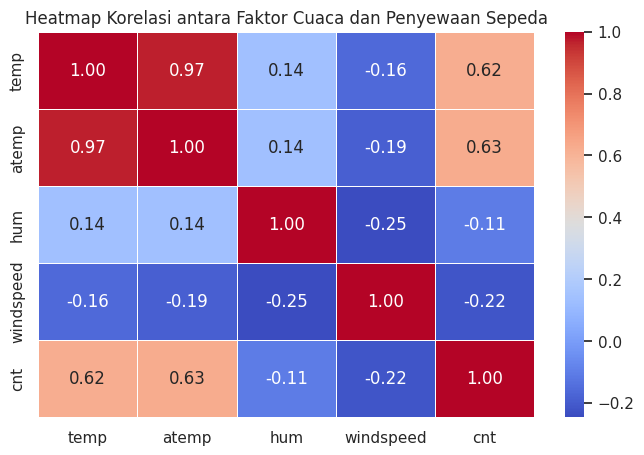

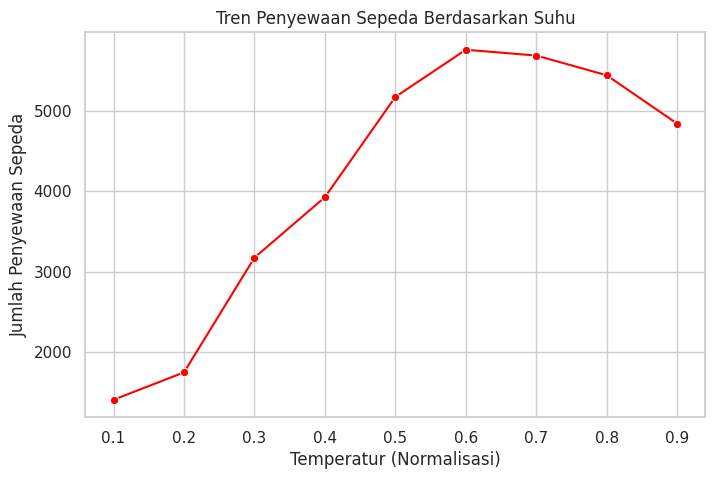

In [134]:
# Pilih variabel yang relevan
correlation_features = ["temp", "atemp", "hum", "windspeed", "cnt"]

# Hitung korelasi antar variabel
corr_matrix = day_df[correlation_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antara Faktor Cuaca dan Penyewaan Sepeda")
plt.show()

# Urutkan data berdasarkan suhu
temp_trend = day_df.groupby("temp")["cnt"].mean().reset_index()

# Plot line chart
plt.figure(figsize=(8, 5))
sns.lineplot(x="temp", y="cnt", data=temp_trend, marker="o", color="red")

# Tambahkan judul dan label
plt.title("Tren Penyewaan Sepeda Berdasarkan Suhu")
plt.xlabel("Temperatur (Normalisasi)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(True)
plt.show()

correlation_features: Daftar ini berisi nama-nama kolom yang akan dianalisis korelasinya, yaitu:
temp: Temperatur yang dinormalisasi.
atemp: Temperatur yang dirasakan (apparent temperature).
hum: Kelembapan relatif.
windspeed: Kecepatan angin.
cnt: Jumlah total penyewaan sepeda.
day_df[correlation_features]: Memilih subset data dari day_df yang hanya mencakup kolom-kolom yang terdaftar dalam correlation_features.
.corr(): Metode ini menghitung koefisien korelasi Pearson antara setiap pasangan variabel dalam subset data tersebut.day_df.groupby("temp")["cnt"].mean(): Mengelompokkan data berdasarkan nilai temp dan menghitung rata-rata cnt untuk setiap kelompok suhu.
.reset_index(): Mengatur ulang indeks sehingga temp menjadi kolom biasa, bukan indeks.


### Pertanyaan 2:

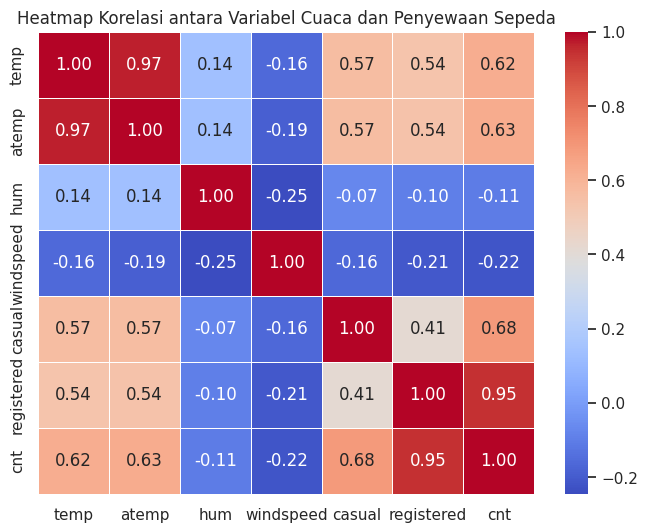

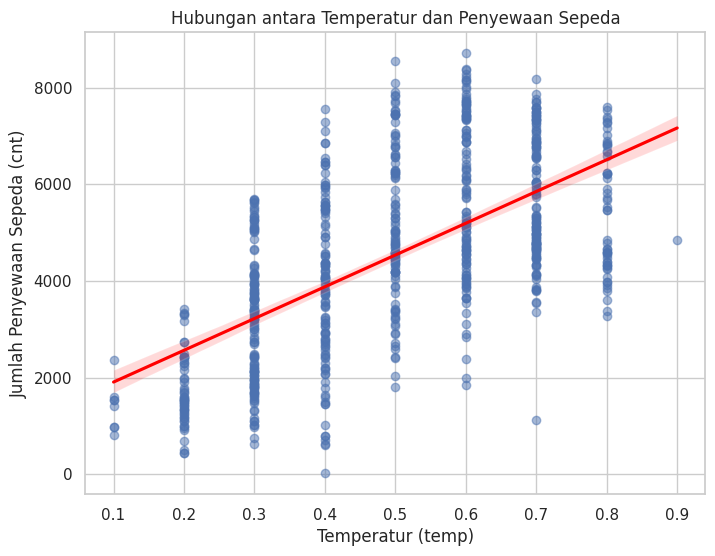

In [135]:
# Pilih kolom yang relevan untuk analisis korelasi
corr_columns = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
correlation_matrix = day_df[corr_columns].corr()

# Buat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antara Variabel Cuaca dan Penyewaan Sepeda")
plt.show()

# Scatter plot dengan regresi antara suhu dan jumlah penyewaan sepeda
plt.figure(figsize=(8, 6))
sns.regplot(x=day_df["temp"], y=day_df["cnt"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Temperatur (temp)")
plt.ylabel("Jumlah Penyewaan Sepeda (cnt)")
plt.title("Hubungan antara Temperatur dan Penyewaan Sepeda")
plt.show()

temp: Temperatur yang dinormalisasi.
atemp: Temperatur yang dirasakan (apparent temperature).
hum: Kelembapan relatif.
windspeed: Kecepatan angin.
casual: Jumlah penyewaan oleh pengguna tidak terdaftar.
registered: Jumlah penyewaan oleh pengguna terdaftar.
cnt: Jumlah total penyewaan sepeda.
day_df[corr_columns].corr(): Menghitung matriks korelasi Pearson antara kolom-kolom yang dipilih.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan heatmap korelasi yang telah dibuat, dapat disimpulkan bahwa:

Suhu (temp) memiliki korelasi positif dengan jumlah penyewaan sepeda (cnt). Ini berarti bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa. Hal ini masuk akal karena cuaca yang lebih hangat cenderung lebih nyaman untuk bersepeda.

Kelembapan (hum) memiliki korelasi negatif dengan jumlah penyewaan sepeda. Artinya, ketika kelembapan meningkat, jumlah penyewaan sepeda cenderung menurun. Udara yang terlalu lembab mungkin membuat aktivitas bersepeda terasa kurang nyaman bagi pengguna.

Kecepatan angin (windspeed) memiliki korelasi yang lemah dengan jumlah penyewaan sepeda. Ini menunjukkan bahwa faktor angin tidak terlalu berpengaruh terhadap keputusan seseorang untuk menyewa sepeda.

Korelasi antara temp dan atemp sangat tinggi, yang berarti bahwa suhu aktual (temp) dan suhu yang dirasakan (atemp) hampir selalu bergerak seiring. Oleh karena itu, keduanya tidak perlu digunakan secara bersamaan dalam model analisis yang lebih lanjut.

- Conclution pertanyaan 2
Suhu memiliki hubungan positif dengan jumlah penyewaan sepeda. Dari grafik terlihat bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa. Tren ini menunjukkan bahwa orang lebih cenderung bersepeda pada cuaca yang lebih hangat.

Korelasi ini tidak selalu linear. Pada suhu yang sangat tinggi, tren penyewaan sepeda tampaknya mulai menurun. Ini mengindikasikan bahwa meskipun cuaca hangat meningkatkan jumlah penyewaan, suhu yang terlalu panas mungkin justru mengurangi minat pengguna untuk bersepeda.

Terdapat variabilitas dalam jumlah penyewaan untuk suhu yang sama. Meskipun tren keseluruhan menunjukkan hubungan positif, masih terdapat titik-titik data yang menyebar, yang berarti faktor lain seperti hari dalam seminggu, kondisi cuaca spesifik (hujan atau tidak), atau tingkat aktivitas kota juga dapat mempengaruhi jumlah penyewaan sepeda.